# Exploring 3D Sinusoidal Data using Artificial Neural Networks

## Overview

The main purpose of this project is to use artificial neural network to solve a regression problem.  In this project, we will fit a neural network to a noisy 3D sinusoidal data set.  We will use a `Sequential` model that can be trained very quickly on the supplied data, so we will manually adjust hyperparameter values and observe their influence on the model's predictions.  

Lastly, we will compute the generalization error on the test set.

## Preliminaries

Let's import some common packages:

In [2]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot3Ddata(data_df):
    x = data_df['x']
    y = data_df['y']
    z = data_df['z']
    
    fig = plt.figure(figsize=(16, 14))
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ax_00 = fig.add_subplot(spec[0, 0], projection='3d')
    ax_01 = fig.add_subplot(spec[0, 1], projection='3d')
    ax_10 = fig.add_subplot(spec[1, 0], projection='3d')
    ax_11 = fig.add_subplot(spec[1, 1], projection='3d')
    
    axs = [ax_00, ax_01, ax_10, ax_11]
    for ax in axs:
        ax.set_xlim(-2, 2)
        ax.set_xticks(np.arange(1.5, -2, -.5))
        ax.set_xlabel('x', c='r', fontname='serif')

        ax.set_ylim(-2, 2)
        ax.set_yticks(np.arange(1.5, -2, -.5))
        ax.set_ylabel('y', c='r', fontname='serif')


        ax.set_zlim(-2, 2)
        ax.set_zticks(np.arange(1.5, -2, -.5))
        ax.set_zlabel('z', c='r', fontname='serif')
    
        ax.scatter3D(x, y, z, alpha=.5)
    
    ax_00.view_init(0, 90)
    ax_01.view_init(45, 0)
    ax_10.view_init(30, 90)
    ax_11.view_init(90, 90)
    
    return axs
    
def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    data_pts = np.array([scat_x, scat_y, scat_z]).T
    data_df = pd.DataFrame(data_pts, columns=['x', 'y', 'z'])
    axs = plot3Ddata(data_df)
    
    for ax in axs:
        ax.scatter3D(fit_x, fit_y, fit_z, c='r')

# Import, Split and Standardize Data

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('3DSinusoidalANN.csv')

X = data[['x', 'z']]
y = data[['y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Plot Data

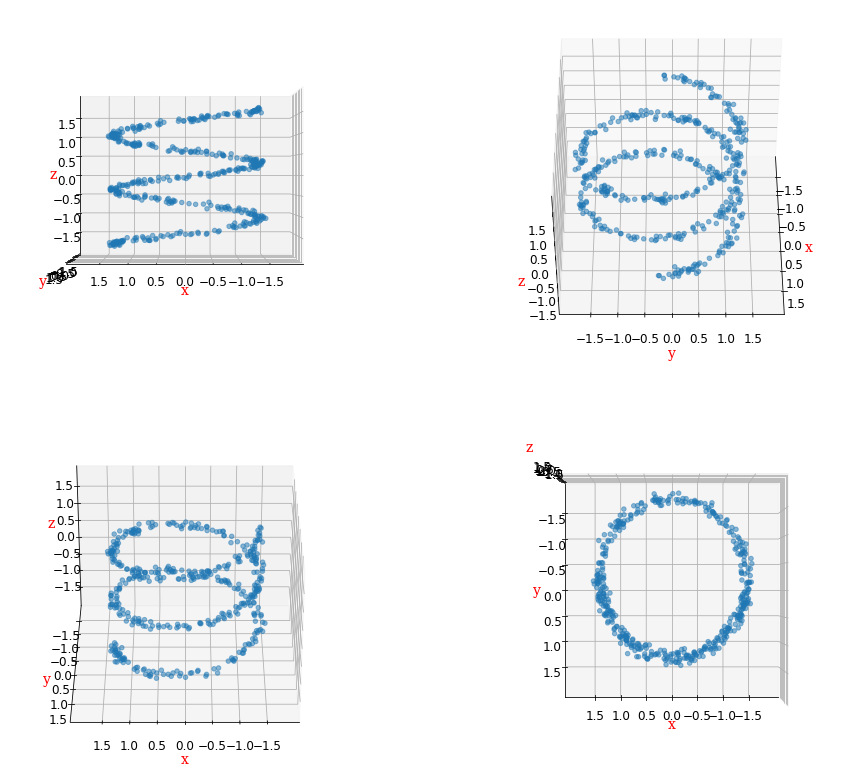

In [4]:
train_df = pd.DataFrame(np.hstack((X_train, y_train)), columns=['x', 'z', 'y'])
plot3Ddata(train_df);

# Explore 3D Sinusoidal Data with Artifical Neural Networks

We fit a `Sequential` model to this data.  We manually assign values to the hyperparameters, including the number of nuerons per layer and the number of layers.  We "play around" by using different combinations of hyperparameter values.

In [43]:
from keras import Sequential
from keras.layers import Dense, ReLU

model = Sequential()
model.add(Dense(16))
model.add(ReLU())
model.add(Dense(32))
model.add(ReLU())
model.add(Dense(64))
model.add(ReLU())
model.add(Dense(32))
model.add(ReLU())
model.add(Dense(16))
model.add(ReLU())
model.add(Dense(1))


model.compile(optimizer='nadam', loss='mse')
model.fit(X_train, y_train, batch_size=4, epochs=150)

Epoch 1/150
112/112 [==============================] - 1s 1ms/step - loss: 0.9640
Epoch 2/150
112/112 [==============================] - 0s 1ms/step - loss: 0.8158
Epoch 3/150
112/112 [==============================] - 0s 1ms/step - loss: 0.4202
Epoch 4/150
112/112 [==============================] - 0s 1ms/step - loss: 0.1279
Epoch 5/150
112/112 [==============================] - 0s 1ms/step - loss: 0.0873
Epoch 6/150
112/112 [==============================] - 0s 1ms/step - loss: 0.0684
Epoch 7/150
112/112 [==============================] - 0s 1ms/step - loss: 0.0668
Epoch 8/150
112/112 [==============================] - 0s 1ms/step - loss: 0.0572
Epoch 9/150
112/112 [==============================] - 0s 1ms/step - loss: 0.0581
Epoch 10/150
112/112 [==============================] - 0s 1ms/step - loss: 0.0541
Epoch 11/150
112/112 [==============================] - 0s 1ms/step - loss: 0.0518
Epoch 12/150
112/112 [==============================] - 0s 1ms/step - loss: 0.0544
Epoch 13/150


### Plot Model Predictions for Training Set

In [44]:
pred_y = model.predict(X_train)

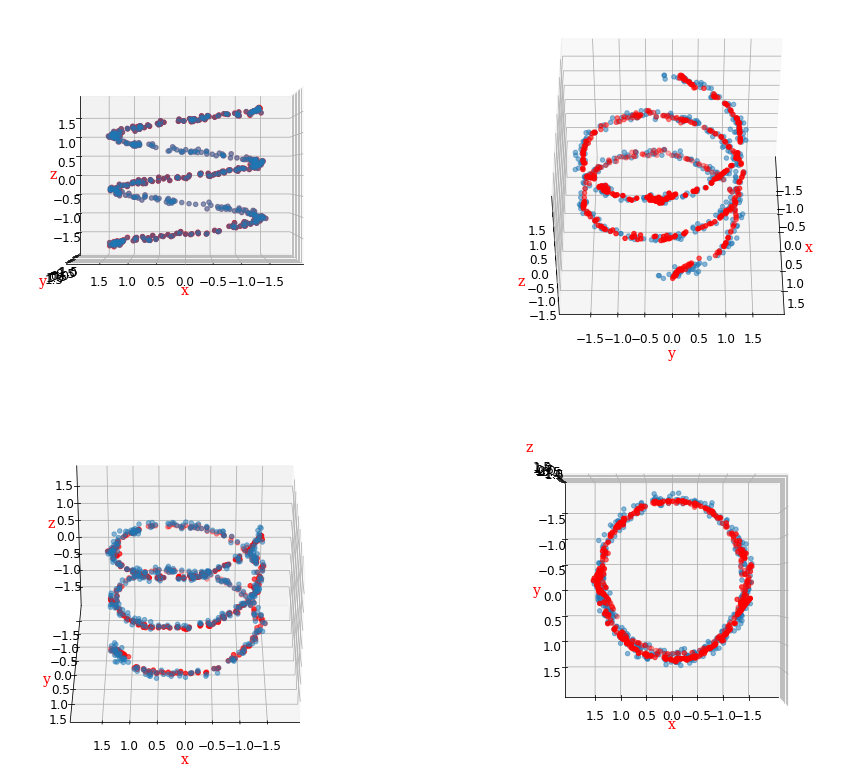

In [45]:
plotscatter3Ddata(fit_x=X_train[:,0], 
                  fit_y=pred_y, 
                  fit_z=X_train[:,1],
                  scat_x=X_train[:, 0], 
                  scat_y=y_train.ravel(), 
                  scat_z=X_train[:, 1]);

# Compute Generalization Error

In [46]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE for the ANN model:", round(mse, 4))


MSE for the ANN model: 0.0147
